In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir(r"D:\Python\project_linear_reg")

In [3]:
os.listdir()

['corrt.csv',
 'd.csv',
 'f.csv',
 'house_price.csv',
 'house_price.xlsx',
 'lr1',
 'o.csv',
 'p.csv',
 'q.csv',
 'rt.csv',
 'u.csv',
 'w.csv']

In [4]:
p=pd.read_csv('house_price.csv')

In [5]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
p.shape

(1460, 80)

In [7]:
p

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### <span style='color:red'>Univariate Analysis</span>

In [8]:
p.describe(include ="O").T
#q.to_csv("q.csv")

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [9]:
p["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
p["MSZoning"]=p["MSZoning"].replace(['RL'], "MS1")
p["MSZoning"]=p["MSZoning"].replace(['RM','FV','RH','C (all)'], "MS2")

In [11]:
p["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
p["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
d=p["Alley"]

In [14]:
#d.to_csv("d.csv")

In [15]:
p["Alley"]=p["Alley"].fillna(value="None")

In [16]:
p["Alley"].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [17]:
p["Alley"]=p["Alley"].replace(["None"],"a1")
p["Alley"]=p["Alley"].replace(['Grvl','Pave'],"a2")

In [18]:
p["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [19]:
p["LotShape"]=p["LotShape"].replace(['Reg'], "LS1")
p["LotShape"]=p["LotShape"].replace(['IR1','IR2','IR3'], "LS2")

In [20]:
p["LandContour"].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [21]:
p["LandContour"]=p["LandContour"].replace(['Lvl'], "LaC1")
p["LandContour"]=p["LandContour"].replace(['Bnk','HLS','Low'], "LaC2")

In [22]:
p["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
p["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [24]:
p["LotConfig"]=p["LotConfig"].replace(['Inside'], "LC1")
p["LotConfig"]=p["LotConfig"].replace(['Corner','CulDSac','FR2','FR3'], "LC2")

In [25]:
p["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [26]:
p["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [27]:
p["Neighborhood"]=p["Neighborhood"].replace(['NAmes','CollgCr','OldTown','Edwards','Somerst'], "Group1")
p["Neighborhood"]=p["Neighborhood"].replace(['Gilbert','NridgHt','Sawyer','NWAmes','SawyerW'], "Group2")
p["Neighborhood"]=p["Neighborhood"].replace(['BrkSide','Crawfor','Mitchel','NoRidge','Timber'], "Group3")
p["Neighborhood"]=p["Neighborhood"].replace(['IDOTRR','ClearCr','SWISU','StoneBr','MeadowV'], "Group4")
p["Neighborhood"]=p["Neighborhood"].replace(['Blmngtn','BrDale','Veenker','NPkVill','Blueste'], "Group5")

In [28]:
p["Neighborhood"].value_counts()

Group1    674
Group2    362
Group3    237
Group4    132
Group5     55
Name: Neighborhood, dtype: int64

In [29]:
p.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,MS1,65.0,8450,Pave,a1,LS1,LaC1,AllPub,LC1,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,MS1,80.0,9600,Pave,a1,LS1,LaC1,AllPub,LC2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,MS1,68.0,11250,Pave,a1,LS2,LaC1,AllPub,LC1,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,MS1,60.0,9550,Pave,a1,LS2,LaC1,AllPub,LC2,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,MS1,84.0,14260,Pave,a1,LS2,LaC1,AllPub,LC2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
p["Condition1"].value_counts()
#need to be checked

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [31]:
p["Condition2"].value_counts()
#need to checked

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [32]:
p["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [33]:
p["BldgType"]=p["BldgType"].replace(['1Fam'], "B1")
p["BldgType"]=p["BldgType"].replace(['TwnhsE','Duplex','Twnhs','2fmCon'], "B2")


In [34]:
p["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [35]:
p["HouseStyle"]=p["HouseStyle"].replace(['1Story','2Story'], "H1")
p["HouseStyle"]=p["HouseStyle"].replace(['1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'], "H2")


In [36]:
p["HouseStyle"].isnull().sum()

0

In [37]:
p["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [38]:
p["RoofStyle"]=p["RoofStyle"].replace(['Gable','Hip'], "R1")
p["RoofStyle"]=p["RoofStyle"].replace(['Flat','Gambrel','Mansard','Shed','AsbShng '], "R2")



In [39]:
p["RoofStyle"].isnull().sum()

0

In [40]:
p["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [41]:
p["RoofMatl"]=p["RoofMatl"].replace(["CompShg"], "g1")
p["RoofMatl"]=p["RoofMatl"].replace(['Tar&Grv','WdShngl','WdShake','Membran','ClyTile','Roll','Metal'], "g2")


In [42]:
p["Exterior1st"].value_counts()#check

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [43]:
p["Exterior1st"]=p["Exterior1st"].replace(['VinylSd','HdBoard','MetalSd','Wd Sdng',"Plywood"], "G1")
p["Exterior1st"]=p["Exterior1st"].replace(['CemntBd','BrkFace','WdShing','Stucco','AsbShng '], "G2")
p["Exterior1st"]=p["Exterior1st"].replace(['BrkComm','Stone ','ImStucc','AsphShn','CBlock '], "G3")


In [44]:
p["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [45]:
p["Exterior2nd"]=p["Exterior2nd"].replace(['VinylSd','HdBoard','MetalSd','Wd Sdng',"Plywood"], "G1")
p["Exterior2nd"]=p["Exterior2nd"].replace(['CemntBd','BrkFace','WdShing','Stucco','AsbShng '], "G2")
p["Exterior2nd"]=p["Exterior2nd"].replace(['BrkComm','Stone ','ImStucc','AsphShn','CBlock '], "G3")

In [46]:
p["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [47]:
p["MasVnrType"]=p["MasVnrType"].fillna(value=0)

In [48]:
p["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
0            8
Name: MasVnrType, dtype: int64

In [49]:
p["MasVnrType"]=p["MasVnrType"].replace(['None'], "m1")
p["MasVnrType"]=p["MasVnrType"].replace(['BrkFace','Stone ','BrkCmn',"0"],"m2")

In [50]:
p["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [51]:
p["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [52]:
p["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [53]:
p["Foundation"]=p["Foundation"].replace(['PConc','BrkTil'], "F1")
p["Foundation"]=p["Foundation"].replace(['CBlock','Slab','Wood',"Stone"],"F2")

In [54]:
p["BsmtQual"].value_counts()#check

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [55]:
p["BsmtQual"]=p["BsmtQual"].fillna(value=0)

In [56]:
p["BsmtQual"].value_counts()#check

TA    649
Gd    618
Ex    121
0      37
Fa     35
Name: BsmtQual, dtype: int64

In [57]:
p["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [58]:
p["BsmtCond"]=p["BsmtCond"].fillna(value="O")

In [59]:
p["BsmtExposure"].value_counts()#check

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [60]:
p["BsmtExposure"]=p["BsmtExposure"].fillna(value="None")

In [61]:
p["BsmtExposure"]=p["BsmtExposure"].replace(['No','GLQ'], "bE1")
p["BsmtExposure"]=p["BsmtExposure"].replace(['Av','Gd','Mn',"None"],"bE2")

In [62]:
p["BsmtFinType1"].value_counts()#check

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [63]:
p["BsmtFinType1"]=p["BsmtFinType1"].fillna(value="None")

In [64]:
p["BsmtFinType1"]=p["BsmtFinType1"].replace(['Unf','GLQ'], "b1_1")
p["BsmtFinType1"]=p["BsmtFinType1"].replace(['Rec','LwQ','BLQ',"ALQ","None"], "b2_1")

In [65]:
p["BsmtFinType2"].value_counts()#check

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [66]:
p["BsmtFinType2"]=p["BsmtFinType2"].fillna(value="None")

In [67]:
p["BsmtFinType2"]=p["BsmtFinType2"].replace(['Unf'], "b1_2")
p["BsmtFinType2"]=p["BsmtFinType2"].replace(['Rec ','LwQ','BLQ',"ALQ", 'GLQ','None'], "b2_2")

In [68]:
p["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [69]:
p["Heating"]=p["Heating"].replace(['GasA'], "H1")
p["Heating"]=p["Heating"].replace(['GasW','Grav','Wall',"OthW", 'Floor'], "H2")

In [70]:
p["HeatingQC"].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [71]:
p["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [72]:
p["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [73]:
p["Electrical"]=p["Electrical"].replace(['SBrkr'], "E1")
p["Electrical"]=p["Electrical"].replace(['FuseA','FuseF','FuseP',"None", 'Mix'], "E2")

In [74]:
p["Electrical"]=p["Electrical"].fillna(value="None")

In [75]:
p["Electrical"].isnull().sum()

0

In [76]:
p["KitchenQual"].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [77]:
p["KitchenQual"].isnull().sum()

0

In [78]:
p["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [79]:
p["Functional"]=p["Functional"].replace(['Typ'], "F1")
p["Functional"]=p["Functional"].replace(['Min2','Min1','Mod',"Maj1", 'Maj2','Sev'], "F2")

In [80]:
p["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [81]:
p["FireplaceQu"].isnull().sum()

690

In [82]:
p["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [83]:
p["GarageType"]=p["GarageType"].fillna(value="None")

In [84]:
p["GarageType"]=p["GarageType"].replace(['Attchd','2Types','None'], "GT1")
p["GarageType"]=p["GarageType"].replace(['Detchd ','BuiltIn','Basment',"CarPort"], "GT2")

In [85]:
p["GarageType"].isnull().sum()

0

In [86]:
p["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [87]:
p["GarageFinish"]=p["GarageFinish"].fillna(value="None")

In [88]:
p["GarageFinish"]=p["GarageFinish"].replace(['Unf','None'], "Gf1")
p["GarageFinish"]=p["GarageFinish"].replace(['RFn ','Fin'], "Gf2")

In [89]:
p["GarageFinish"].isnull().sum()

0

In [90]:
p["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [91]:
p["PavedDrive"].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [92]:
p["PavedDrive"]=p["PavedDrive"].replace(['Y'], "PD1")
p["PavedDrive"]=p["PavedDrive"].replace(['N','P'], "PD2")

In [93]:
p["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [94]:
p["PoolQC"].isnull().sum()

1453

In [95]:
p["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [96]:
p["Fence"].isnull().sum()

1179

In [97]:
p["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [98]:
p["MiscFeature"].value_counts()



Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [99]:
p["MiscFeature"]=p["MiscFeature"].fillna(value="None")

In [100]:
p["MiscFeature"]=p["MiscFeature"].replace(['None'], "MF1")
p["MiscFeature"]=p["MiscFeature"].replace(['Shed','Gar2','Othr','ConLI','TenC'], "MF2")

In [101]:
p["SaleType"]=p["SaleType"].replace(['WD'], "ST1")
p["SaleType"]=p["SaleType"].replace(['New','COD','ConLD','ConLI','ConLw','CWD','Oth','Con'], "ST2")

In [102]:
p["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [103]:
p["SaleCondition"]=p["SaleCondition"].replace(['Normal'], "SC1")
p["SaleCondition"]=p["SaleCondition"].replace(['Partial','Abnorml','Family','Alloca','AdjLand'], "SC2")

In [104]:
p.describe(include ="int64").T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [105]:
p.describe(include ="float64").T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


### <span style='color:Blue'>Bivariate Analysis</span>

# sale price vs x

In [106]:
#int64

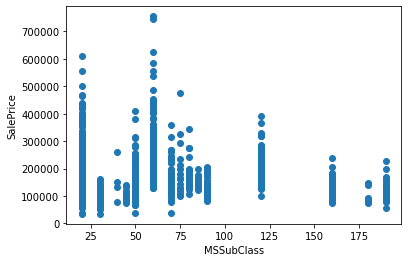

<Figure size 1440x1080 with 0 Axes>

In [107]:
plt.scatter(p["MSSubClass"],p["SalePrice"])
plt.xlabel("MSSubClass")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [108]:
np.corrcoef(p["LotArea"],p["SalePrice"])

array([[1.        , 0.26384335],
       [0.26384335, 1.        ]])

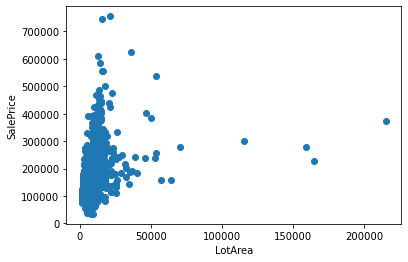

<Figure size 1440x1080 with 0 Axes>

In [109]:
plt.scatter(p["LotArea"],p["SalePrice"])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

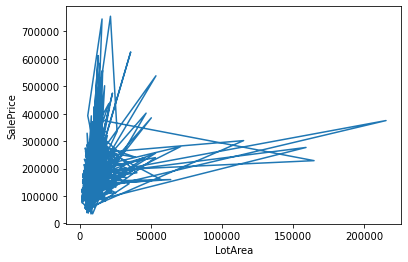

<Figure size 1440x1080 with 0 Axes>

In [110]:
plt.plot(p["LotArea"],p["SalePrice"])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

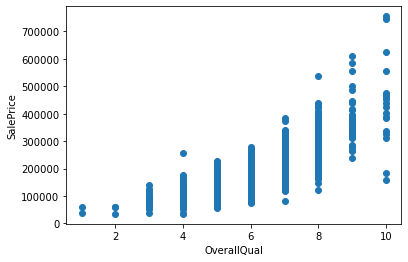

<Figure size 1440x1080 with 0 Axes>

In [111]:
plt.scatter(p["OverallQual"],p["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

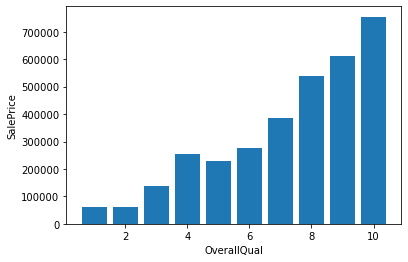

<Figure size 1440x1080 with 0 Axes>

In [112]:
plt.bar(p["OverallQual"],p["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

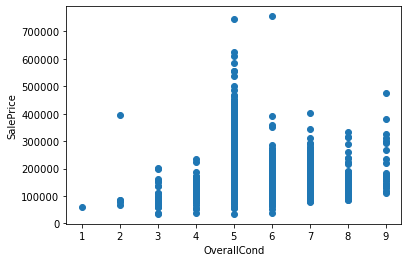

<Figure size 1440x1080 with 0 Axes>

In [113]:
plt.scatter(p["OverallCond"],p["SalePrice"])
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

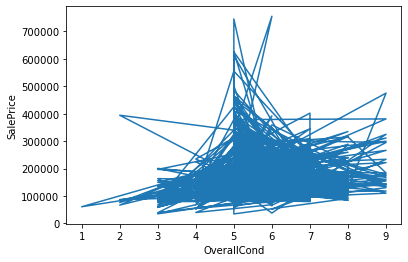

<Figure size 1440x1080 with 0 Axes>

In [114]:
plt.plot(p["OverallCond"],p["SalePrice"])
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

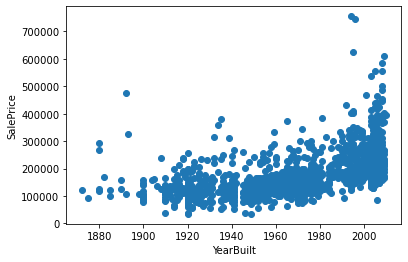

<Figure size 1440x1080 with 0 Axes>

In [115]:
plt.scatter(p["YearBuilt"],p["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

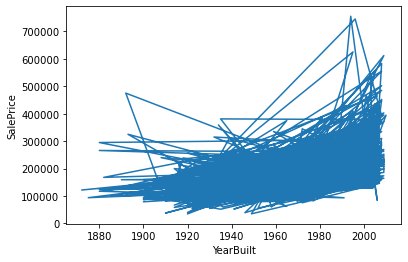

<Figure size 1440x1080 with 0 Axes>

In [116]:
plt.plot(p["YearBuilt"],p["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

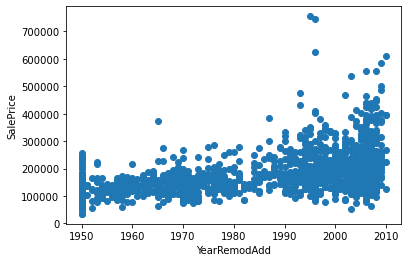

<Figure size 1440x1080 with 0 Axes>

In [117]:
plt.scatter(p["YearRemodAdd"],p["SalePrice"])
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

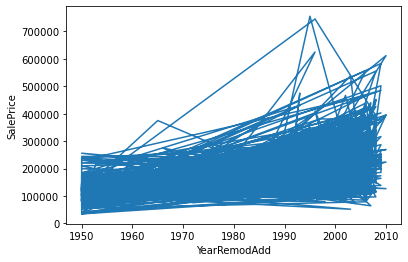

<Figure size 1440x1080 with 0 Axes>

In [118]:
plt.plot(p["YearRemodAdd"],p["SalePrice"])
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

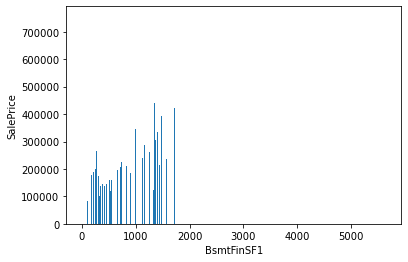

<Figure size 1440x1080 with 0 Axes>

In [119]:
plt.bar(p["BsmtFinSF1"],p["SalePrice"])
plt.xlabel("BsmtFinSF1")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

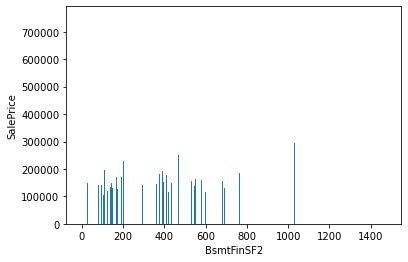

<Figure size 1440x1080 with 0 Axes>

In [120]:
plt.bar(p["BsmtFinSF2"],p["SalePrice"])
plt.xlabel("BsmtFinSF2")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

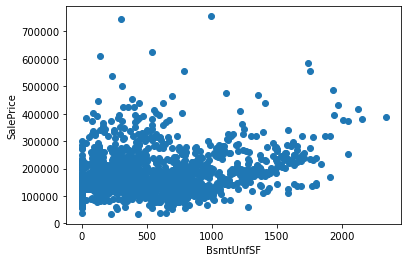

<Figure size 1440x1080 with 0 Axes>

In [121]:
#BsmtUnfSF
plt.scatter(p["BsmtUnfSF"],p["SalePrice"])
plt.xlabel("BsmtUnfSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

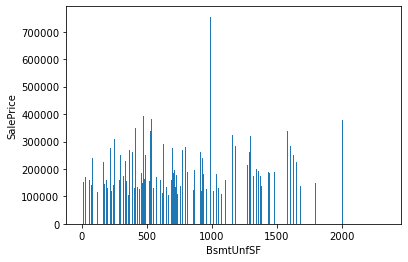

<Figure size 1440x1080 with 0 Axes>

In [122]:
plt.bar(p["BsmtUnfSF"],p["SalePrice"])
plt.xlabel("BsmtUnfSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

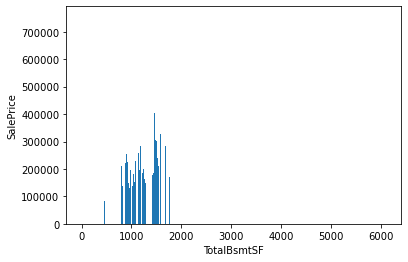

<Figure size 1440x1080 with 0 Axes>

In [123]:
plt.bar(p["TotalBsmtSF"],p["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

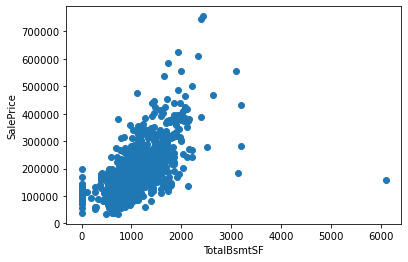

<Figure size 1440x1080 with 0 Axes>

In [124]:
plt.scatter(p["TotalBsmtSF"],p["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

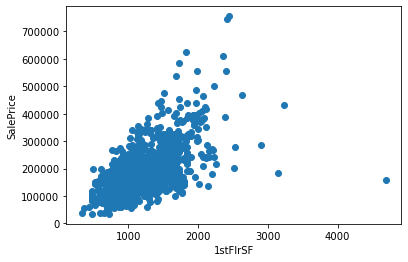

<Figure size 1440x1080 with 0 Axes>

In [125]:
plt.scatter(p["1stFlrSF"],p["SalePrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [126]:
p.describe(include ="int64").T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


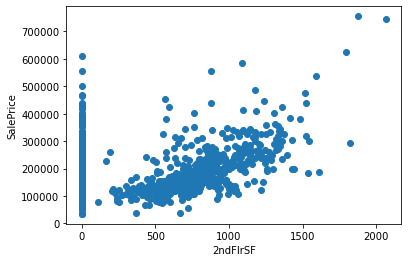

<Figure size 1440x1080 with 0 Axes>

In [127]:
plt.scatter(p["2ndFlrSF"],p["SalePrice"])
plt.xlabel("2ndFlrSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

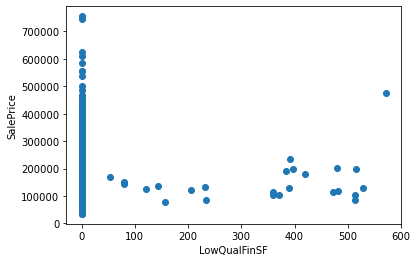

<Figure size 1440x1080 with 0 Axes>

In [128]:
plt.scatter(p["LowQualFinSF"],p["SalePrice"])
plt.xlabel("LowQualFinSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [129]:
np.corrcoef(p["LowQualFinSF"],p["SalePrice"])

array([[ 1.        , -0.02560613],
       [-0.02560613,  1.        ]])

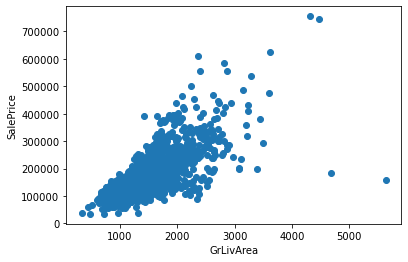

<Figure size 1440x1080 with 0 Axes>

In [130]:
plt.scatter(p["GrLivArea"],p["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

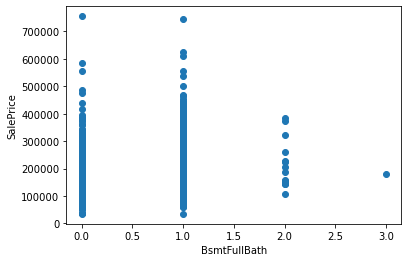

<Figure size 1440x1080 with 0 Axes>

In [131]:
plt.scatter(p["BsmtFullBath"],p["SalePrice"])
plt.xlabel("BsmtFullBath")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

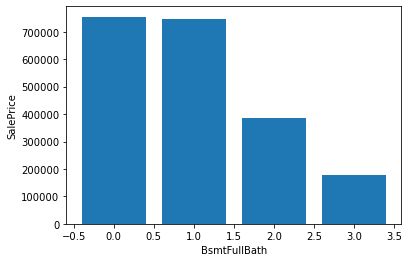

<Figure size 1440x1080 with 0 Axes>

In [132]:
plt.bar(p["BsmtFullBath"],p["SalePrice"])
plt.xlabel("BsmtFullBath")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

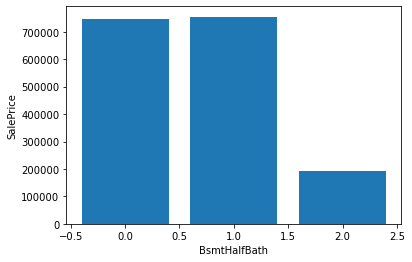

<Figure size 1440x1080 with 0 Axes>

In [133]:
plt.bar(p["BsmtHalfBath"],p["SalePrice"])
plt.xlabel("BsmtHalfBath")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

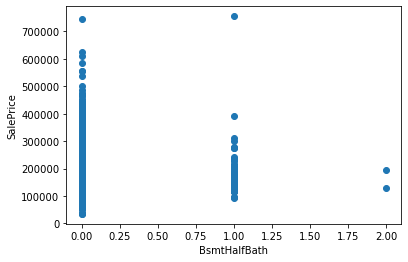

<Figure size 1440x1080 with 0 Axes>

In [134]:
plt.scatter(p["BsmtHalfBath"],p["SalePrice"])
plt.xlabel("BsmtHalfBath")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [135]:
p["BsmtHalfBath"].nunique()

3

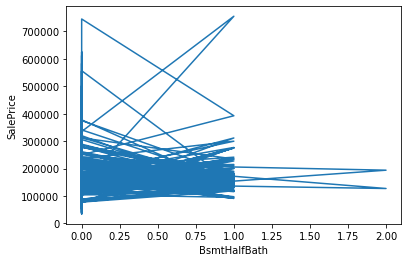

<Figure size 1440x1080 with 0 Axes>

In [136]:
plt.plot(p["BsmtHalfBath"],p["SalePrice"])
plt.xlabel("BsmtHalfBath")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [137]:
p["FullBath"].nunique()

4

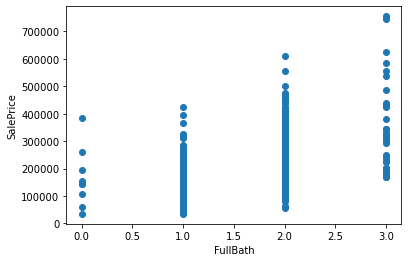

<Figure size 1440x1080 with 0 Axes>

In [138]:
plt.scatter(p["FullBath"],p["SalePrice"])
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

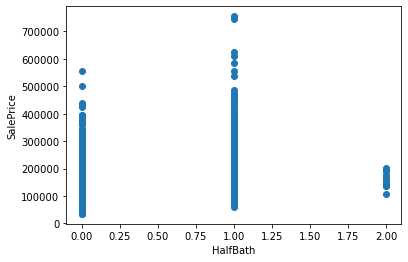

<Figure size 1440x1080 with 0 Axes>

In [139]:
plt.scatter(p["HalfBath"],p["SalePrice"])
plt.xlabel("HalfBath")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

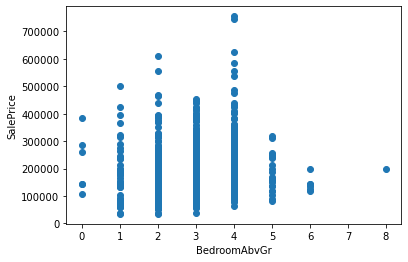

<Figure size 1440x1080 with 0 Axes>

In [140]:
plt.scatter(p["BedroomAbvGr"],p["SalePrice"])
plt.xlabel("BedroomAbvGr")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [141]:
np.corrcoef(p["KitchenAbvGr"],p["SalePrice"])

array([[ 1.        , -0.13590737],
       [-0.13590737,  1.        ]])

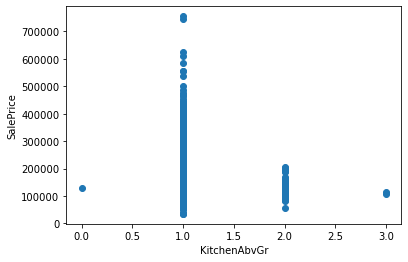

<Figure size 1440x1080 with 0 Axes>

In [142]:
plt.scatter(p["KitchenAbvGr"],p["SalePrice"])
plt.xlabel("KitchenAbvGr")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

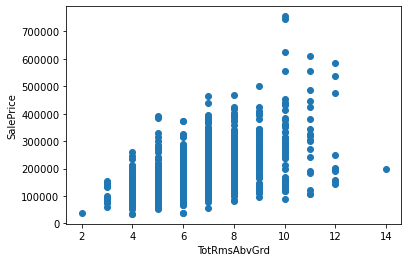

<Figure size 1440x1080 with 0 Axes>

In [143]:
plt.scatter(p["TotRmsAbvGrd"],p["SalePrice"])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

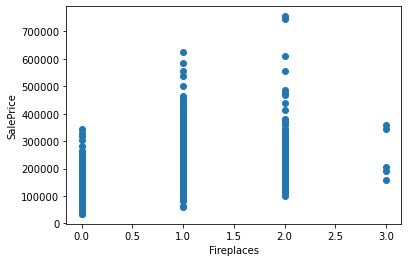

<Figure size 1440x1080 with 0 Axes>

In [144]:

plt.scatter(p["Fireplaces"],p["SalePrice"])
plt.xlabel("Fireplaces")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

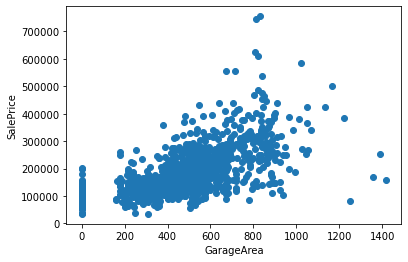

<Figure size 1440x1080 with 0 Axes>

In [145]:
plt.scatter(p["GarageArea"],p["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

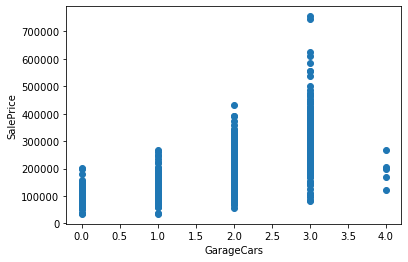

<Figure size 1440x1080 with 0 Axes>

In [146]:
plt.scatter(p["GarageCars"],p["SalePrice"])
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [147]:
np.corrcoef(p["GarageCars"],p["SalePrice"])

array([[1.       , 0.6404092],
       [0.6404092, 1.       ]])

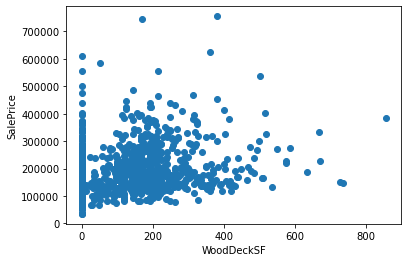

<Figure size 1440x1080 with 0 Axes>

In [148]:
plt.scatter(p["WoodDeckSF"],p["SalePrice"])
plt.xlabel("WoodDeckSF")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [149]:
np.corrcoef(p["WoodDeckSF"],p["SalePrice"])

array([[1.        , 0.32441344],
       [0.32441344, 1.        ]])

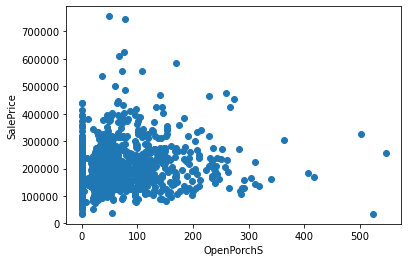

<Figure size 1440x1080 with 0 Axes>

In [150]:
plt.scatter(p["OpenPorchSF"],p["SalePrice"])
plt.xlabel("OpenPorchS")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [151]:
np.corrcoef(p["OpenPorchSF"],p["SalePrice"])

array([[1.        , 0.31585623],
       [0.31585623, 1.        ]])

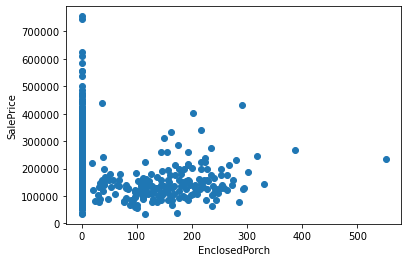

<Figure size 1440x1080 with 0 Axes>

In [152]:
plt.scatter(p["EnclosedPorch"],p["SalePrice"])
plt.xlabel("EnclosedPorch")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [153]:
np.corrcoef(p["EnclosedPorch"],p["SalePrice"])

array([[ 1.        , -0.12857796],
       [-0.12857796,  1.        ]])

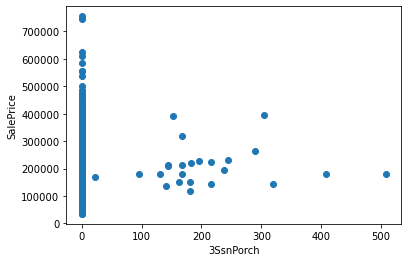

<Figure size 1440x1080 with 0 Axes>

In [154]:
plt.scatter(p["3SsnPorch"],p["SalePrice"])
plt.xlabel("3SsnPorch")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

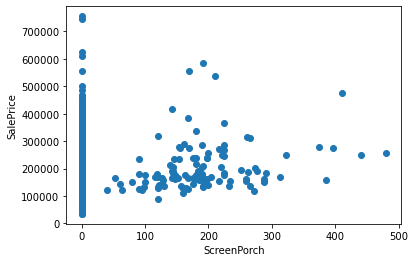

<Figure size 1440x1080 with 0 Axes>

In [155]:
plt.scatter(p["ScreenPorch"],p["SalePrice"])
plt.xlabel("ScreenPorch")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

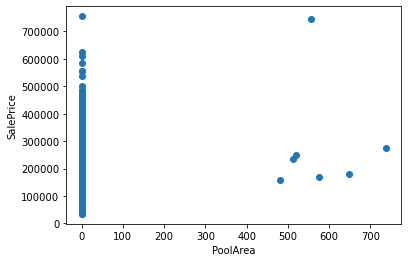

<Figure size 1440x1080 with 0 Axes>

In [156]:
plt.scatter(p["PoolArea"],p["SalePrice"])
plt.xlabel("PoolArea")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [157]:
np.corrcoef(p["PoolArea"],p["SalePrice"])

array([[1.        , 0.09240355],
       [0.09240355, 1.        ]])

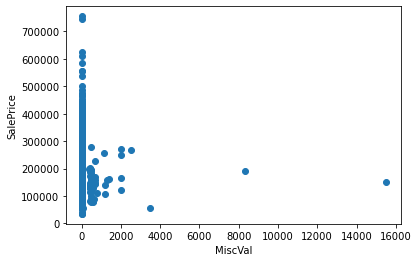

<Figure size 1440x1080 with 0 Axes>

In [158]:
plt.scatter(p["MiscVal"],p["SalePrice"])
plt.xlabel("MiscVal")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [159]:
np.corrcoef(p["MiscVal"],p["SalePrice"])

array([[ 1.        , -0.02118958],
       [-0.02118958,  1.        ]])

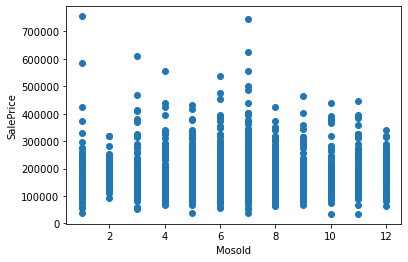

<Figure size 1440x1080 with 0 Axes>

In [160]:
plt.scatter(p["MoSold"],p["SalePrice"])
plt.xlabel("Mosold")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [161]:
np.corrcoef(p["MoSold"],p["SalePrice"])

array([[1.        , 0.04643225],
       [0.04643225, 1.        ]])

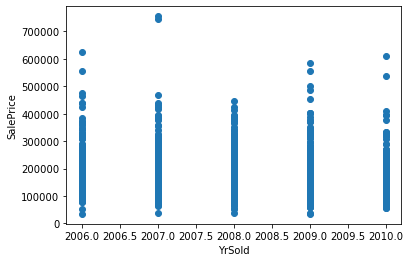

<Figure size 1440x1080 with 0 Axes>

In [162]:
plt.scatter(p["YrSold"],p["SalePrice"])
plt.xlabel("YrSold")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [163]:
np.corrcoef(p["YrSold"],p["SalePrice"])

array([[ 1.        , -0.02892259],
       [-0.02892259,  1.        ]])

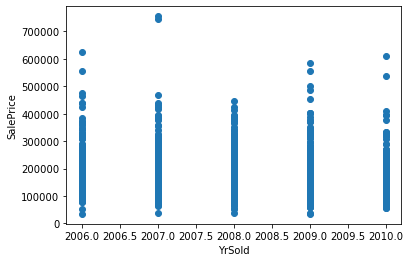

<Figure size 1440x1080 with 0 Axes>

In [164]:
plt.scatter(p["YrSold"],p["SalePrice"])
plt.xlabel("YrSold")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

## FLOAT

In [165]:
p.describe(include ="Float64").T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


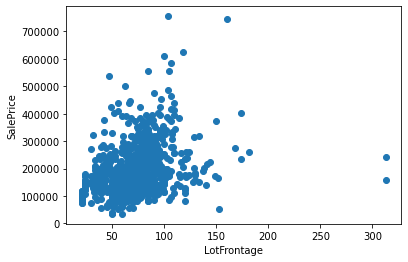

<Figure size 1440x1080 with 0 Axes>

In [166]:
plt.scatter(p["LotFrontage"],p["SalePrice"])
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [167]:
p["LotFrontage"]=p["LotFrontage"].fillna(value=p["LotFrontage"].median())

In [168]:
np.corrcoef(p["LotFrontage"],p["SalePrice"])

array([[1.        , 0.33477085],
       [0.33477085, 1.        ]])

In [169]:
p["LotFrontage"].isnull().sum()

0

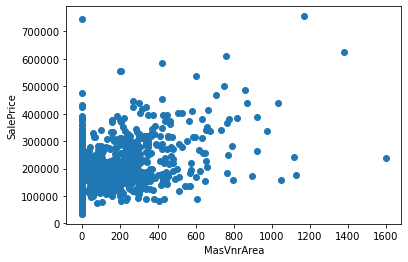

<Figure size 1440x1080 with 0 Axes>

In [170]:
plt.scatter(p["MasVnrArea"],p["SalePrice"])
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

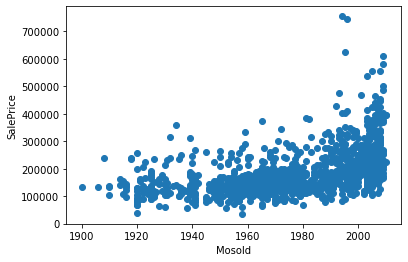

<Figure size 1440x1080 with 0 Axes>

In [171]:
plt.scatter(p["GarageYrBlt"],p["SalePrice"])
plt.xlabel("Mosold")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [172]:
w=p[p["GarageYrBlt"].isna()].T

In [173]:
w.to_csv("w.csv")

In [174]:
p["GarageYrBlt"].isnull().sum()

81

In [175]:
p["GarageYrBlt"].fillna(value=0)

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [176]:
p["GarageYrBlt"]=p["GarageYrBlt"].fillna(value=0)

In [177]:
p["MasVnrArea"]=p["MasVnrArea"].fillna(value=0)

In [178]:
np.corrcoef(p["MasVnrArea"],p["SalePrice"])

array([[1.       , 0.4726145],
       [0.4726145, 1.       ]])

In [179]:
p["MasVnrArea"].isnull().sum()

0

In [180]:
np.corrcoef(p["GarageYrBlt"],p["SalePrice"])

array([[1.        , 0.26136644],
       [0.26136644, 1.        ]])

## categorical

In [181]:
p.describe(include ="O").T

,count,unique,top,freq
MSZoning,1460,2,MS1,1151
Street,1460,2,Pave,1454
Alley,1460,2,a1,1369
LotShape,1460,2,LS1,925
LandContour,1460,2,LaC1,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,2,LC1,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,5,Group1,674
Condition1,1460,9,Norm,1260


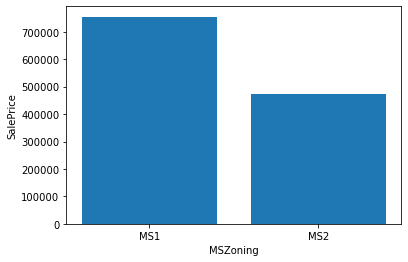

<Figure size 1440x1080 with 0 Axes>

In [182]:
plt.bar(p["MSZoning"],p["SalePrice"])
plt.xlabel("MSZoning")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

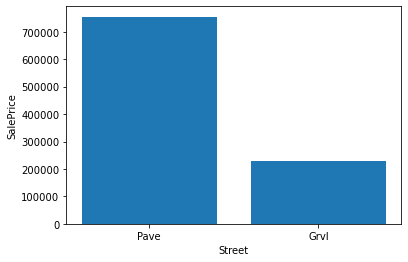

<Figure size 1440x1080 with 0 Axes>

In [183]:
plt.bar(p["Street"],p["SalePrice"])
plt.xlabel("Street")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

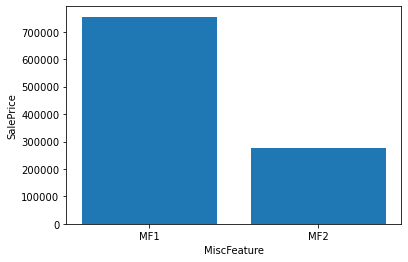

<Figure size 1440x1080 with 0 Axes>

In [184]:
plt.bar(p["MiscFeature"],p["SalePrice"])
plt.xlabel("MiscFeature")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [185]:
p.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [186]:
#d= pd.pivot_table(p,values = ['MSSubClass'],index = ['SalePrice'])

In [187]:
#d1=d.reset_index()

In [188]:
#d1

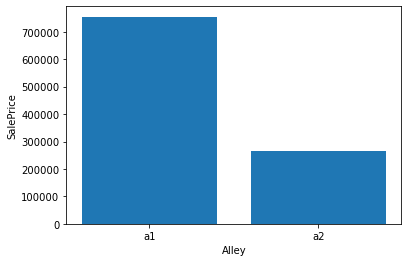

<Figure size 1440x1080 with 0 Axes>

In [189]:
plt.bar(p["Alley"],p["SalePrice"])
plt.xlabel("Alley")
plt.ylabel("SalePrice")
plt.figure(figsize = (20, 15))
plt.show()

In [190]:
p.shape

(1460, 80)

In [191]:
p1=p.copy()

In [192]:
p3=p.copy()

In [193]:
p1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

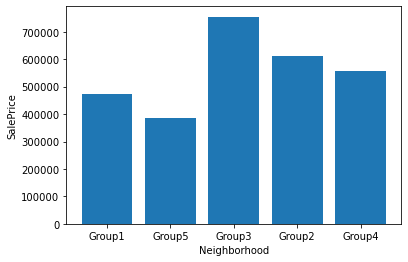

<Figure size 2160x1800 with 0 Axes>

In [194]:
plt.bar(p['Neighborhood'],p["SalePrice"])
plt.xlabel('Neighborhood')
plt.ylabel("SalePrice")
plt.figure(figsize = (30, 25))
plt.show()

In [195]:
p1.shape

(1460, 80)

In [196]:
p2=p1.drop(columns=['Condition1','Condition2','ExterQual','ExterCond','BsmtQual','BsmtCond','TotalBsmtSF',
              'HeatingQC','LowQualFinSF','KitchenQual','TotRmsAbvGrd','FireplaceQu','GarageArea',
              'GarageQual', 'GarageCond', 'PoolQC','Fence','MoSold'])

In [197]:
p3=p1.drop(columns=['Condition1','Condition2','ExterQual','ExterCond','BsmtQual','BsmtCond','TotalBsmtSF',
              'HeatingQC','LowQualFinSF','KitchenQual','TotRmsAbvGrd','FireplaceQu','GarageArea',
              'GarageQual', 'GarageCond', 'PoolQC','Fence','MoSold'])

In [198]:
p2.shape

(1460, 62)

In [199]:
p2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [200]:
p3.describe(include ="O").T

,count,unique,top,freq
MSZoning,1460,2,MS1,1151
Street,1460,2,Pave,1454
Alley,1460,2,a1,1369
LotShape,1460,2,LS1,925
LandContour,1460,2,LaC1,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,2,LC1,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,5,Group1,674
BldgType,1460,2,B1,1220


In [201]:
p2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [202]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [203]:
p3=pd.get_dummies(p3,columns=["MSZoning","Street","Alley","LotShape","LandContour",
                              "Neighborhood","BldgType","HouseStyle","RoofStyle",
                             "RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                             "MasVnrType","Foundation","BsmtExposure","BsmtFinType1","BsmtFinType2",
                             "Heating","CentralAir","Electrical","Functional","GarageType","GarageFinish",
                             "PavedDrive",'SaleType','SaleCondition',"MiscFeature"], drop_first=True)

In [204]:
p3=pd.get_dummies(p3,columns=['Utilities','LotConfig','LandSlope'], drop_first=True)

In [205]:
p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   LotFrontage          1460 non-null   float64
 2   LotArea              1460 non-null   int64  
 3   OverallQual          1460 non-null   int64  
 4   OverallCond          1460 non-null   int64  
 5   YearBuilt            1460 non-null   int64  
 6   YearRemodAdd         1460 non-null   int64  
 7   MasVnrArea           1460 non-null   float64
 8   BsmtFinSF1           1460 non-null   int64  
 9   BsmtFinSF2           1460 non-null   int64  
 10  BsmtUnfSF            1460 non-null   int64  
 11  1stFlrSF             1460 non-null   int64  
 12  2ndFlrSF             1460 non-null   int64  
 13  GrLivArea            1460 non-null   int64  
 14  BsmtFullBath         1460 non-null   int64  
 15  BsmtHalfBath         1460 non-null   i

In [206]:
corr=p3.corr()

In [207]:
corr.to_csv("f.csv")

In [208]:
p3.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice', 'MSZoning_MS2', 'Street_Pave', 'Alley_a2',
       'LotShape_LS2', 'LandContour_LaC2', 'Neighborhood_Group2',
       'Neighborhood_Group3', 'Neighborhood_Group4', 'Neighborhood_Group5',
       'BldgType_B2', 'HouseStyle_H2', 'RoofStyle_R2', 'RoofStyle_R2',
       'RoofMatl_g2', 'Exterior1st_CBlock', 'Exterior1st_G1', 'Exterior1st_G2',
       'Exterior1st_G3', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_G1',
       'Exterior2nd_G2', 'Exterior

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

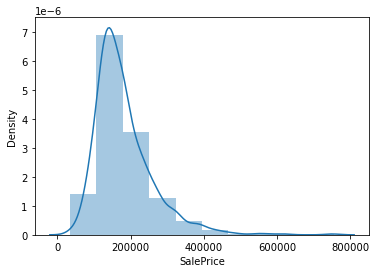

In [211]:
sns.distplot(p3['SalePrice'], bins=10)
plt.plot()

In [212]:
from scipy.stats import shapiro

In [213]:
shapiro(p3["SalePrice"])

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

In [214]:
p3['Sales_log']=np.log1p(p3['SalePrice'])

In [215]:
shapiro(p3["Sales_log"])

ShapiroResult(statistic=0.9912054538726807, pvalue=1.1467612637261482e-07)

In [217]:
p3['Sales_sqrt']=np.sqrt(p3['SalePrice'])

In [218]:
shapiro(p3["Sales_sqrt"])

ShapiroResult(statistic=0.9554811120033264, pvalue=1.1143702087512663e-20)

In [219]:
p3['Sales_log2']=np.log2(p3['SalePrice'])

In [220]:
shapiro(p3["Sales_log2"])

ShapiroResult(statistic=0.9912069439888, pvalue=1.1494053353544587e-07)

In [221]:
X=p3[['MSSubClass', 'LotFrontage', 'LotArea', 
     'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold',
       'MSZoning_MS2', 'Street_Pave', 'Alley_a2', 'LotShape_LS2',
       'LandContour_LaC2', 'Neighborhood_Group2', 'Neighborhood_Group3',
       'Neighborhood_Group4', 'Neighborhood_Group5', 'BldgType_B2',
       'HouseStyle_H2', 'RoofStyle_R2', 'RoofStyle_R2', 'RoofMatl_g2',
       'Exterior1st_CBlock', 'Exterior1st_G1', 'Exterior1st_G2',
       'Exterior1st_G3', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_G1',
       'Exterior2nd_G2', 'Exterior2nd_G3', 'Exterior2nd_Other',
       'Exterior2nd_Stone', 'Exterior2nd_Wd Shng', 'MasVnrType_Stone',
       'MasVnrType_m1', 'MasVnrType_m2', 'Foundation_F2', 'BsmtExposure_bE2',
       'BsmtFinType1_b2_1', 'BsmtFinType2_b1_2', 'BsmtFinType2_b2_2',
       'Heating_H2', 'CentralAir_Y', 'Electrical_E2', 'Electrical_None',
       'Functional_F2', 'GarageType_GT1', 'GarageType_GT2', 'GarageFinish_Gf2',
       'GarageFinish_RFn', 'PavedDrive_PD2', 'SaleType_ST2',
       'SaleCondition_SC2', 'MiscFeature_MF2','Utilities_NoSeWa','LotConfig_LC2','LandSlope_Mod',
       'LandSlope_Sev']]


Y=p3['Sales_sqrt']

In [240]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .2, random_state = 45)

In [223]:
lin = LinearRegression() 

In [241]:
lin.fit(xTrain,yTrain)

LinearRegression()

In [242]:
lin.intercept_

1293.6214430982359

In [243]:
lin.coef_

array([-1.47380165e-01, -1.07162693e-01,  4.54684718e-04,  1.70255567e+01,
        6.91348555e+00,  3.91209435e-01,  2.16051333e-01,  3.17055661e-02,
        3.46092978e-03,  1.26328617e-02,  1.35664765e-03,  3.71329308e-03,
       -3.45978231e-03,  5.08785921e-02,  1.36967166e+01,  4.30916428e+00,
        9.16809242e+00,  2.06843314e+00, -2.42802178e+00, -3.80155736e+00,
        6.86912137e+00, -6.82799457e-03,  1.61647289e+01,  2.19475261e-02,
        2.09995534e-02,  1.86790489e-02,  4.89924097e-02,  6.44704325e-02,
       -4.32614011e-02,  7.86175493e-04, -1.18319692e+00, -1.35747628e+01,
        4.78086829e+01,  5.41802857e+00, -3.54154184e-01, -7.89582487e+00,
        1.43421748e+00,  1.59913461e+01,  1.27885673e+01,  2.08414801e+00,
       -5.79354668e+00, -2.72705819e+00,  3.78106245e+00,  3.78106245e+00,
        3.78106245e+00,  3.78106245e+00, -7.62809767e+00,  6.75626584e+00,
        1.55914098e+01,  3.02280409e+01, -1.86249718e+01,  5.54925735e+01,
       -1.99367588e+01,  

In [244]:
yPrediction = lin.predict(xTrain)

In [245]:
yPrediction

array([434.60645456, 342.38232497, 374.79042561, ..., 436.1840342 ,
       487.9428457 , 406.60439196])

In [246]:
y_pred_anti=yPrediction
y_act_anti=yTrain

In [247]:
pred = pd.DataFrame({'Actual Sale': y_act_anti, 'Predicted sales': y_pred_anti})
df_pred=pred.head(25)
df_pred

,Actual Sale,Predicted sales
1075,468.508271,434.606455
372,353.553391,342.382325
502,374.165739,374.790426
924,455.521679,457.231375
662,331.662479,385.592989
700,559.016994,564.445733
1373,683.008053,658.111021
732,471.699057,479.672855
1183,346.410162,377.929474
655,296.647939,326.590145


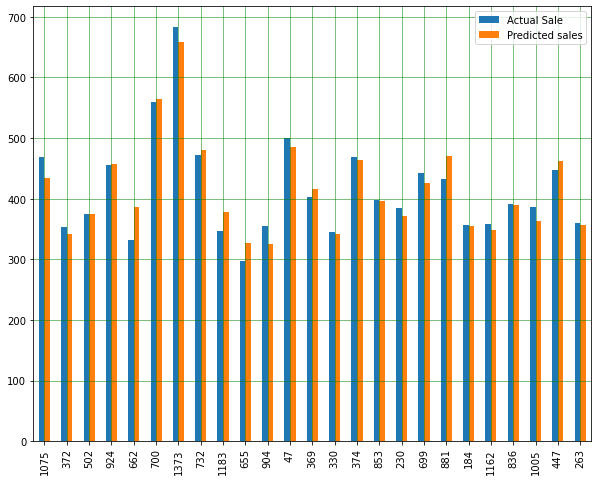

In [248]:
df_pred.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [249]:
SS_Residual = sum((yTrain-yPrediction)**2)
SS_Total = sum((yTrain-np.mean(yTrain))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(yTrain)-1)/(len(yTrain)-xTrain.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.8687884622436457 0.858349801515573


In [232]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(yTrain, yPrediction)
r2 = r2_score(yTrain, yPrediction)

In [250]:
r2

0.8763978707537294

In [252]:
ytestPrediction=lin.predict(xTest)

In [253]:
rmse = mean_squared_error(yTest, ytestPrediction)
r2 = r2_score(yTest, ytestPrediction)

In [254]:
r2

0.8852944310768833